# Probabilités V - Projet numérique : longueur d'un câble sous-marin
# Camille Klopocki, Capéraa Damien

## Enoncé du problème

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac{1}{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

## Questions théoriques

**Question 1 :** Quel théorème du cours nous autorise à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

La variable aléatoire $\mathbf{L}$ est bien intégrable et si l'on note $X = \big(Z(x_{j_1}),...,Z(x_{j_n})\big)$, alors on a :
$$\mathbb{E}(\mathbb{E}(L|X)) = \mathbb{E}(L)$$
d'après le théorème page 11 du cours Probabilités IV (formule de l'espérance totale). Ici,  $\mathbb{E}(\mathbb{E}(L|X))$ est une estimation de l'espérance conditionnelle difficilement accessible par le calcul et $\mathbb{E}(L)$ est estimée par la moyenne empirique de simulations conditionnelles.

**Question 2 :** Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

Nous notons, pour cette question :
* $J = \{j_1,...,j_n\}$ l'ensemble des indices associés aux points d'observation de la profondeur ; 
* $I = [\![0, N]\!]\backslash J$ est l'ensemble des indices associés aux points de discrétisation sans observation ;
* $Y = \big(Z(x_i)\big)_{i\in I}$ le vecteur des composantes de $\textbf{Z}$ correspondant aux points de discrétisation sans observation ; 
* $X = \big(Z(x_j)\big)_{j\in J}$ le vecteur associé aux points d'observation ;
* $C_Y = \big(\sigma_{ij}\big)_{(i, j) \in I^2} = \big(C(\lvert x_i - x_j \rvert)\big)_{(i, j) \in I^2}$ la matrice de covariance de $Y$ ;
* $C_X = \big(\sigma_{ij}\big)_{(i, j) \in J^2}$ la matrice de covariance de $X$ ;
* $C_{Y,X} = \big(\sigma_{ij}\big)_{(i, j) \in I \times J}$ ;
* $C_{X,Y} = \big(\sigma_{ij}\big)_{(i, j) \in J \times I}$ ;
* Les vecteurs espérance de $X$ et $Y$, notés $m_X$ et $m_Y$,  sont composés de la seule valeur $\mu$, respectivement $card(J)$ et $card(I)$ fois.

Avec ces notations, nous savons d'après la démonstration des pages 12 à 14 du cours Probabilités IV que la variable aléatoire $Y|X=x$ est une **gaussienne** d'espérance $m_Y + C_{Y,X}C^{-1}_X(x-m_X)$ et de matrice de covariance $C_Y - C_{Y,X}C^{-1}_XC_{X,Y}$.

**Question 3 :** Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ inversible et $m$ est un vecteur de taille $p$ ?

On a : $\mathbb{V}(Z) = \mathbb{E}((RY)^2) = RI_dR^t = RR^t$ et comme $R$ est supposée inversible, $RR^t$ est définie positive. Ainsi $\textbf{Z}$ est un **vecteur gaussien à densité**, caractérisé par sa matrice de covariance égale à $RR^t$ et son espérance égale à $m$ (par linéarité de l'espérance et par définition de $\mathbf{Y}$).


**Question 4 :** En déduire un algorithme de simulation conditionnelle.

N'étant pas nécessaire de simuler les points de discrétisation avec observation de la profondeur, notre objectif dans cette question est de simuler le vecteur aléatoire gaussien $W = Y|\{X=x\}$ correspondant aux points de discrétisation sans observation. Nous pourrons alors en déduire une estimation de la valeur de $\mathbf{L}$. En effet, cet algorithme de simulation conditionnelle va nous permettre de faire plusieurs estimations de la longueur de câble nécessaire pour une réalisation donnée de $X$. Un moyennage de ces estimations nous permettra d'accéder à l'estimation de la valeur de $L$ recherchée. \
Notons $C_W$ et $m_W$ respectivement la matrice de covariance et le vecteur espérance de $W$ dont les formules sont données en question 2.

L'algorithme de simulation suit alors les étapes suivantes :
1. Simuler deux variables aléatoires $U$ et $V$ indépendantes, de loi uniforme sur $]0, 1[$.\
   Méthode : méthode des congruences détaillée page 4 du cours Probabilités V\
   Cela nous permet ainsi de simuler une variable aléatoire de loi normale centrée réduite : $G = \sqrt{-2ln(U)}cos(2\pi V)$ (d'après le résultat de Box-Maller)
2. Calculer la *décomposition de Cholesky* de $C_W$ : $C_W = TT^t$ avec $T$ triangulaire inférieure. \
   Validité du calcul : $C_W$ est définie positive car $W$ est un vecteur gaussien, ainsi sa décomposition de Cholesky existe. \
   Supposition : on obtient une matrice $T$ inversible.\
   Cela nous permet d'expliciter une variable aléatoire qui suit la même loi que $W$. Il s'agit de $m_W + TG$ (cf question 3), qui suit la loi $\mathcal{N}(m_W, TT^t) = \mathcal{N}(m_W, C_W)$.

# Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données (qui sont toutes en mètres pour les longueurs) : $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


# Implémentation

## Préambule

In [1]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt
import math

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))

In [2]:
# Une fonction qui nous sera très utile par la suite, et qui permet de concaténer les données sur les points
# d'observation avec celles des points de simulation, dans le bon ordre spatial.
def concatenate(list_unknowns, list_observed):
    result = []
    c = 0 # compteur indices de list_observed
    d = 0 # compteur indices de list_unknowns
    for i in range(N):
        if i in observation_indexes:
            result.append(list_observed[c])
            c += 1
        else :
            result.append(list_unknowns[d])
            d += 1
    return result

## Questions

**Question 1 :** Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [3]:
def covariance(D, a, sigma2):
    ''' D peut être du type float ou du type np.ndarray. Dans le premier cas,
    la fonction retourne la covariance entre les deux points distants de D.
    Dans le second cas, elle retourne la matrice de covariance associée.'''
    if isinstance(D, float):
        return sigma2 * np.exp(-abs(D)/a)
    elif isinstance(D, np.ndarray):
        n = D.shape[0]  # nombre de points
        C = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                C[i, j] = sigma2 * np.exp(-abs(D[i, j])/a)
        return C
    else:
        raise TypeError("D n'est pas du bon type.")

**Question 2 :** Calculer la matrice de distance.

In [4]:
def distance(Delta, N):
    ''' Retourne la matrice des distances connaissant l'intervalle entre deux
    points consécutifs Delta et le nombre de points N.
    Delta et N sont des variables globales.'''
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            D[i, j] = Delta * abs(j -i)
    return D

**Question 3 :** Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [5]:
covariance_Z = covariance(distance(Delta, N), a, sigma2)

**Question 4 :** Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [6]:
# Entre les observations
cov_observations = covariance_Z[np.ix_(observation_indexes, observation_indexes)]
# Entre les observations et les inconnues : matrice non carrée
cov_observations_and_unknowns = covariance_Z[np.ix_(unknown_indexes, observation_indexes)]
# Entre les inconnues
cov_unknowns = covariance_Z[np.ix_(unknown_indexes, unknown_indexes)]

**Question 5 :** Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

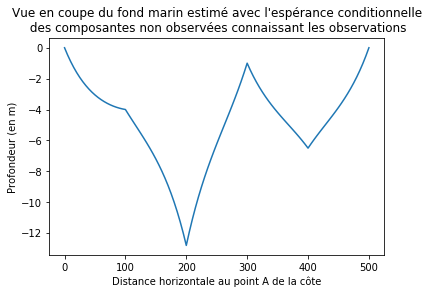

In [7]:
# En prenant les notations de la question 2 de la partie théorique :
nb_observations = len(observation_indexes)
nb_unknowns = N - nb_observations
m_Y = np.array([mu] * nb_unknowns)
C_Y_X = cov_observations_and_unknowns
C_X = cov_observations
C_X_inv = np.linalg.inv(C_X)
x = depth
m_X = np.array([mu] * nb_observations)
m_W = m_Y + np.dot(C_Y_X, np.dot(C_X_inv, (x - m_X)))

conditional_expectation = concatenate(m_W, depth)
plt.plot(discretization, conditional_expectation)
plt.title("Vue en coupe du fond marin estimé avec l'espérance conditionnelle\n \
des composantes non observées connaissant les observations")
plt.ylabel("Profondeur (en m)")
plt.xlabel("Distance horizontale au point A de la côte")
plt.show()

**Question 6 :** Calculer la matrice de covariance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

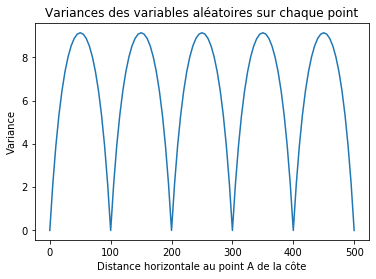

In [8]:
# Toujours en gardant les notations de la question 2 :
C_X_Y = C_Y_X.transpose() # par symétrie de la matrice covariance_Z
C_Y = cov_unknowns
C_W = C_Y - np.dot(np.dot(C_Y_X, C_X_inv), C_X_Y)
diagonal= [C_W[i, i] for i in range(C_W.shape[0])]
all_variances = concatenate(diagonal, [0]*nb_observations)
    # La variance est prise nulle au niveau des points d'observation car ces 
    # derniers sont fixés pour une réalisation de X donnée.
plt.plot(discretization, all_variances)
plt.title("Variances des variables aléatoires sur chaque point")
plt.ylabel("Variance")
plt.xlabel("Distance horizontale au point A de la côte")
plt.show()

*Commentaire* : On observe sur le graphique que la variance des variables aléatoires donnant la profondeur $\big(Z(x_i)\big)$ diminue à proximité des points d'observation, tandis qu'elle est maximale entre deux points d'observation. Cela semble logique : en raison des valeurs fixées par les points d'observation, la profondeur est moins "libre" d'avoir de grandes variations près des observations qu'à mi-distance entre deux observations. Autrement dit, la profondeur d'un point est d'autant plus "libre" - ou "inconnue" - que ce point est éloigné des points de profondeur connue.

**Question 7 :** Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

Notre objectif dans cette question est de simuler la variable aléatoire $W$ définie plus haut. On suit l'algorithme proposé en question 4. Pour cela, la fonction `uniforme` permet de générer une suite de nombres aléatoires pour simuler les variables $U$ et $V$ de l'algorithme.

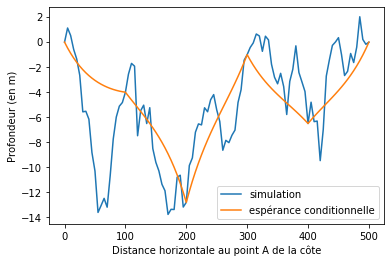

In [9]:
def uniforme(a, m):
    ''' Génère une suite de nombres pseudo-aléatoire suivant une loi uniforme
    sur ]0,1[ suivant la méthode des congruences détaillée page 4 du cours Probabilités V. 
    On pourra prendre a = 1000 et m = 2001179 : la corrélation
    entre les nombres générés est alors de l'ordre de 10^(-3), on peut
    considérer qu'ils sont indépendants.'''
    k = math.floor((m-1)/2) # k0
    while True:
        u = k/m
        k = a*k % m
        yield u

generator = uniforme(1000, 2001179)
# U et V suivent une loi uniforme sur [0, 1]
U = np.array([next(generator) for i in range(nb_unknowns)]) 
V = np.array([next(generator) for i in range(nb_unknowns)])
# G suit une loi normale centrée réduite
G = np.sqrt(-2*np.log(U)) * np.cos(2*np.pi*V)
T = np.linalg.cholesky(C_W) # Fonction numpy qui calcule la décomposition 
                            # de Cholesky de C_W
# W est la variable que l'on voulait simuler (loi normale de moyenne m_W 
# et de matrice de covariance C_W)
W = m_W + np.dot(T, G)

simulation = concatenate(W, depth)
plt.plot(discretization, simulation, label='simulation')
plt.plot(discretization, conditional_expectation, label='espérance conditionnelle')
plt.ylabel("Profondeur (en m)")
plt.xlabel("Distance horizontale au point A de la côte")
plt.legend()
plt.show()

*Commentaire :* On remarque qu'à l'exception des points d'observations, la simulation ne suit pas très bien la courbe de l'espérance conditionnelle. Cette différence est inhérente au caractère aléatoire de la simulation : il faudra sans doute moyenner sur plusieurs simulations pour obtenir une courbe proche de celle de l'espérance conditionnelle.

**Question 8 :** Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [10]:
def longueur_cable(Z, Delta):
    ''' Retourne la longueur du câble connaissant le vecteur Z des profondeurs
    et Delta le pas de discrétisation.'''
    return sum(math.sqrt(Delta**2 + (Z[i+1] - Z[i])**2) for i in range(N -1))

**Question 9 :** Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

*Remarque 1 :* Pour pallier la répétition de la suite générée par notre fonction `uniforme`, et permettre des simulations différentes à chaque exécution de la fonction, nous utilisons désormais la fonction numpy `np.random.random` pour simuler $U$ et $V$.

*Remarque 2 :* Nous mettons artificiellement les questions 9 à 13 sous forme de définition afin de faciliter la reprise de ces questions pour une nombre de simulations supérieur en question 14. De la même façon, nous définissons une fonction `longueurs_generation` qui retourne les longueurs de câbles pour un nombre de simulations égal à `number_simulations`. Cette construction nous peremttra, dans la question 14, de n'effectuer qu'une simulation initiale pour chaque valeur de `number_simulations` (1000, 10000 et 100000) et des les utiliser dans toutes les reprises de questions.

In [11]:
def longueurs_generation(number_simulations):
    longueurs = []
    T = np.linalg.cholesky(C_W)
    for i in range(number_simulations):
        U = np.array([np.random.random() for i in range(nb_unknowns)])
        V = np.array([np.random.random() for i in range(nb_unknowns)])
        G = np.sqrt(-2*np.log(U)) * np.cos(2*np.pi*V)
        W = m_W + np.dot(T, G)
        simulation = concatenate(W, depth)
        longueurs.append(longueur_cable(simulation, Delta))
    return longueurs

longueurs100 = longueurs_generation(100)
print(f"Longueur du câble à partir de {len(longueurs100)} simulations : \
{sum(longueurs100)/len(longueurs100)}")
print(f"Longueur calculée avec l'espérance conditionnelle : \
{longueur_cable(conditional_expectation, Delta)}")

Longueur du câble à partir de 100 simulations : 521.8870151454446
Longueur calculée avec l'espérance conditionnelle : 501.6468416918411


*Commentaire :* Nous observons, en répétant les expériences, que les simulations donnent toujours une longueur de câble proche de $522 \;m$. Cette valeur est toujours supérieure à la longueur calculée avec l'espérance conditionnelle (environ $502 \;m$).

**Question 10 :** Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

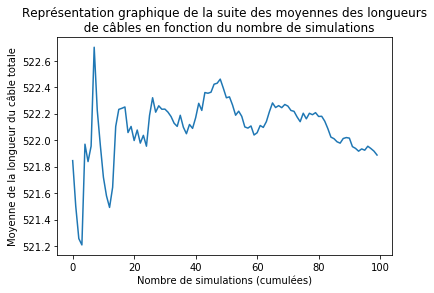

In [12]:
def question10(longueurs_bis):
    '''Retourne la liste des moyennes au cours de l'évolution du
    nombre de simulation.'''
    number_simulations = len(longueurs_bis)
    moyennes = []
    for i in range(1, len(longueurs_bis)+1):
        moyennes.append(sum(longueurs_bis[:i])/i)
    return moyennes

moyennes = question10(longueurs100)
plt.plot(moyennes)
plt.title("Représentation graphique de la suite des moyennes des longueurs\n \
 de câbles en fonction du nombre de simulations")
plt.xlabel("Nombre de simulations (cumulées)")
plt.ylabel("Moyenne de la longueur du câble totale")
plt.show()


*Commentaire :* La moyenne des longueurs de câble tend à se stabiliser vers un valeur proche de $522.5 \;m$. Pour 100 simulations, cette stabilisation n'est pas toujours flagrante, mais c'est bien ce que l'on observe pour un nombre de simulations plus élevé (cf question 14).

**Question 11 :** Représenter l'histogramme des longueurs de câbles générées.

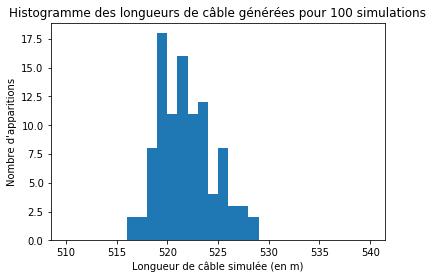

In [13]:
graph = plt.hist(longueurs100, range=(510, 540), bins=30)
plt.xlabel("Longueur de câble simulée (en m)")
plt.ylabel("Nombre d'apparitions")
plt.title ("Histogramme des longueurs de câble générées pour 100 simulations")
plt.show()

**Question 12 :** Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

Une **première méthode** consiste faire une évaluation de type A.  \
On peut considérer $n_0$ valeurs de longueurs simulées et mesurer l'incertitude sur la moyenne des longueurs en utilisant une loi de Student avec un coefficient d'élargissement pour un indice de confiance de $95%$. La *loi de Student* convient pour $n$ inférieur à $20$ environ. Prenons $n_0=19$ par exemple. Le coefficient d'élargissement à considérer vaut alors : $2,10$.

In [22]:
def question12_1e_methode(longueurs_simulation):
    '''Retourne la moyenne et l'incertitude élarge d'un liste
    de longueurs simulées.'''
    moyenne_cable = sum(longueurs_simulation)/n0
    sigma_cable = math.sqrt(sum([(longueurs_simulation[i] - \
        moyenne_cable)**2 for i in range (n0)])/(n0-1)) # Ecart-type "expérimental"
    u_moyenne_cable = sigma_cable/math.sqrt(n0) # Incertitude-type
    U_moyenne_cable = 2.10 * u_moyenne_cable # Incertitude élargie
    return moyenne_cable, U_moyenne_cable

n0=19
longueurs_simulation = longueurs_generation(n0)
moyenne_cable, U_moyenne_cable = question12_1e_methode(longueurs_simulation)
print(f"Avec {len(longueurs_simulation) } simulations, on trouve que \
la longueur du câble vaut {moyenne_cable} +/- {U_moyenne_cable} (IC 95%).\n\
D'où, pour {len(longueurs_simulation)} simulations, on obtient un \
intervalle de confiance à 95% (en m) de [{moyenne_cable - U_moyenne_cable}, \
{moyenne_cable + U_moyenne_cable}].")

Avec 19 simulations, on trouve que la longueur du câble vaut 522.4322895425839 +/- 1.119310897665299 (IC 95%).
D'où, pour 19 simulations, on obtient un intervalle de confiance à 95% (en m) de [521.3129786449186, 523.5516004402492].


*Commentaire 1ère méthode* : Cette première méthode nous donne un intervalle de confiance trop restreint vis-à-vis de l'histogramme obtenu en question 11. Nous entendons par là que cet intervalle ne contient pas, à l'évidence, 95% des longueurs simulées représentées dans l'histogramme. \
Cette méthode est normalement utilisée pour des mesures empiriques, ie lors de mesures expérimentales vérifiant des conditions de répétabilité. C'est ici la non adéquation entre des mesures empiriques et des valeurs simulées par notre algorithme qui doit expliquer cette incohérence.

Une **deuxième méthode** consiste à réaliser un nombre $n_1$ (ici $n_1 = 100$) de simulations de la longueur du câble. Après avoir trié la liste des longueurs simulées, on exclut, à droite et à gauche de la moyenne, les 2.5% de valeurs extrémales.

In [28]:
def question12_2e_methode(longueurs):
    n1 = len(longueurs)
    moyenne_cable = sum(longueurs)/n1
    longueurs.append(moyenne_cable)
    longueurs.sort()
    i = longueurs.index(moyenne_cable)
    i_min = i - math.floor(0.475*len(longueurs))
    i_max = i + math.floor(0.475*len(longueurs))
    if i_min < 0: # On reporte les indices "manquants" à droite de la moyenne.
                # L'intervalle de confiance ne sera alors plus centré autour de la moyenne,
                # mais c'est la seule solution pour qu'il contienne 95% des valeurs simulées.
        i_max += abs(i_min)
        i_min = 0
    elif i_max > len(longueurs)-1: # Idem mais dans l'autre sens : on reporte les
                                # indices manquants à gauche de la moyenne.
        i_min -= (i_max - len(longueurs) + 1)
        i_max = len(longueurs)-1
    return longueurs[i_min], longueurs[i_max]

borne_inf, borne_sup = question12_2e_methode(longueurs100)
print(f"Intervalle de confiance à 95% (en m) : [{borne_inf}, {borne_sup}]")

Intervalle de confiance à 95% (en m) : [518.4156936398016, 528.5411203764124]


*Commentaire 2e méthode* : On obtient un intervalle de confiance **bien plus large qu'avec la première méthode** et plus cohérent vis-à-vis de l'histogramme. Néanmoins, la longueur de câble donnée par l'espérance conditionnelle n'est toujours pas inclue dans cet intervalle (cf la différence obtenue en question 9) et nous sommes conscients de la non perfection de cet algorithme : nous avons simplifié le code en supposant que l'intervalle à 95% excluait les 2,5% extremales à droite et à gauche de la moyenne, la symétrie n'étant pas normalement nécessaire dans la réalité.

**Question 13 :** Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

On peut estimer cette probabilité en calculant la proportion de longueurs de câble simulées qui dépassent 525m parmi toutes les longueurs de câble simulées.

In [16]:
def question13(longueurs_bis):
    longueurs_sup_525 = [x for x in longueurs_bis if x>=525]
    proba_sup_525 = len(longueurs_sup_525)/len(longueurs_bis)
    return (proba_sup_525)

print(f"(Pour {len(longueurs100)} simulations) Probabilité que la \
longueur du câble dépasse 525m : {question13(longueurs100)}")

(Pour 100 simulations) Probabilité que la longueur du câble dépasse 525m : 0.16


**Question 14 :** Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter.

In [17]:
longueurs1000 = longueurs_generation(1000)
longueurs10000 = longueurs_generation(10000)
longueurs100000 = longueurs_generation(100000)
moyennes1000 = question10(longueurs1000)
moyennes10000 = question10(longueurs10000)
moyennes100000 = question10(longueurs100000)

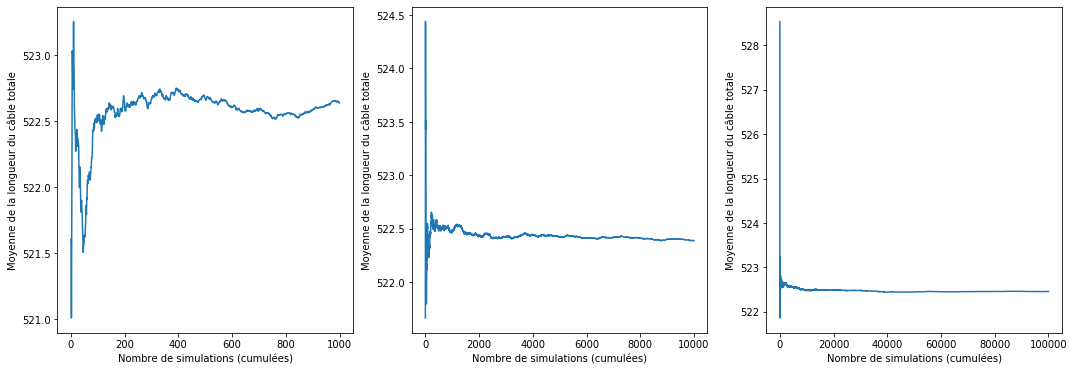

In [18]:
#Reprise de la question 10 pour 1000, 10000 et 100000 simulations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6))
ax1.plot(moyennes1000)
ax1.set(xlabel = "Nombre de simulations (cumulées)", ylabel = "Moyenne de la longueur du câble totale" )
ax2.plot(moyennes10000)
ax2.set(xlabel = "Nombre de simulations (cumulées)", ylabel = "Moyenne de la longueur du câble totale" )
ax3.plot(moyennes100000)
ax3.set(xlabel = "Nombre de simulations (cumulées)", ylabel = "Moyenne de la longueur du câble totale" )
plt.show()

In [19]:
moyennes100000[99999]

522.4582586908646

*Commentaire* : Quand le nombre de simulations est élevé, la moyenne des longueurs de câble se stabilise à la valeur qui apparaît ci-dessus. On retrouve l'écart à l'espérance conditionnelle obtenue avec la formule déjà observé à la question 10.

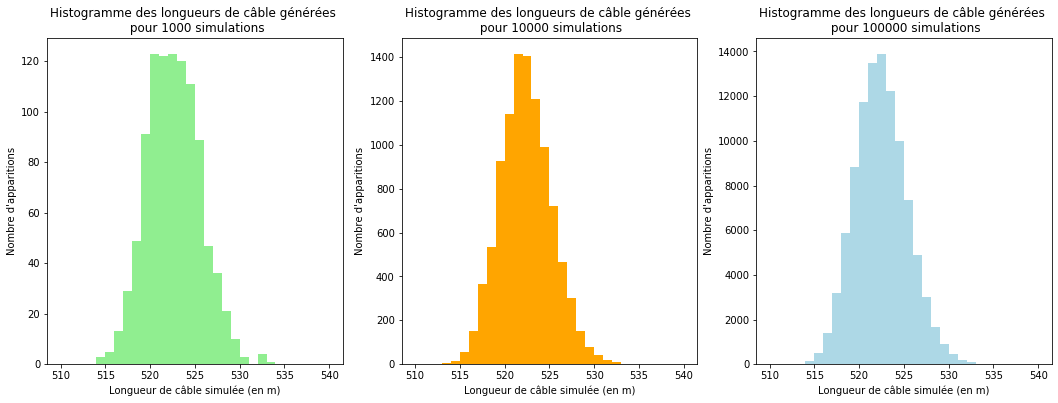

In [20]:
#Reprise de la question 11 pour 1000, 10000 et 100000 simulations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6))

graph1 = ax1.hist(longueurs1000, range=(510, 540), bins=30)
ax1.hist(longueurs1000, range=(510, 540), bins=30, color="lightgreen")
ax1.set(xlabel = "Longueur de câble simulée (en m)", ylabel = "Nombre d'apparitions", \
       title = "Histogramme des longueurs de câble générées \n pour 1000 simulations")

graph2 = ax2.hist(longueurs10000, range=(510, 540), bins=30)
ax2.hist(longueurs10000, range=(510, 540), bins=30, color="orange")
ax2.set(xlabel = "Longueur de câble simulée (en m)", ylabel = "Nombre d'apparitions", \
       title = "Histogramme des longueurs de câble générées \n pour 10000 simulations")


graph3 = ax3.hist(longueurs100000, range=(510, 540), bins=30)
ax3.hist(longueurs100000, range=(510, 540), bins=30, color="lightblue")
ax3.set(xlabel = "Longueur de câble simulée (en m)", ylabel = "Nombre d'apparitions", \
       title = "Histogramme des longueurs de câble générées \n pour 100000 simulations")

plt.show()

*Commentaire :* Nous observons, par l'allure des grapes ci-dessus, que lorsque le nombre de simulation augmente, la distribution des longueurs simulées se rapproche d'une distribution normale. Pour 1000 simulations, l'allure de la gaussienne comme à apparaître mais présente des défauts ; à l'inverse, pour 100000 simulations, elle se dessine plutôt bien, malgré une moyenne légèrement excentrée vers la gauche.

Pour la question 12, la première méthode ne peut pas être reprise avec un nombre variable de simulations car il faut nécessairement l'appliquer à un nombre inférieur à 20 de simulations. Nous ne reprenons donc que la deuxième méthode.

In [26]:
#Reprise de la deuxième méthode de la question 12 pour 1000, 10000 et 10000 simulations
borne_inf_1000, borne_sup_1000 = question12_2e_methode(longueurs1000)
borne_inf_10000, borne_sup_10000 = question12_2e_methode(longueurs10000)
borne_inf_100000, borne_sup_100000 = question12_2e_methode(longueurs100000)
print(f"Intervalle de confiance à 95% (en m) pour 1000 simulations :\
[{borne_inf_1000}, {borne_sup_1000}]")
print(f"Intervalle de confiance à 95% (en m) pour 10000 simulations :\
[{borne_inf_10000}, {borne_sup_10000}]")
print(f"Intervalle de confiance à 95% (en m) pour 100000 simulations :\
[{borne_inf_100000}, {borne_sup_100000}]")

Intervalle de confiance à 95% (en m) pour 1000 simulations :[517.7579878880251, 529.582094383175]
Intervalle de confiance à 95% (en m) pour 10000 simulations :[517.5666897382739, 529.727455236808]
Intervalle de confiance à 95% (en m) pour 100000 simulations :[517.6919490382121, 529.815185687075]


*Commentaire :* L'augmentation du nombre de simulation de fait pas beaucoup varier l'intervalle de confiance. Celui-ci semble être stable dès 1000 simulations. On remarque de plus que cet intervalle ne contient pas la longueur déterminée avec l'espérance conditionnelle...

In [27]:
#Reprise de la question 13 pour 1000, 10000 et 100000 simulations
print(f"(Pour {len(longueurs1000)} simulations) Probabilité que la \
longueur du câble dépasse 525m : {question13(longueurs1000)}")
print(f"(Pour {len(longueurs10000)} simulations) Probabilité que la \
longueur du câble dépasse 525m : {question13(longueurs10000)}")
print(f"(Pour {len(longueurs100000)} simulations) Probabilité que la \
longueur du câble dépasse 525m : {question13(longueurs100000)}")

(Pour 1002 simulations) Probabilité que la longueur du câble dépasse 525m : 0.21057884231536927
(Pour 10002 simulations) Probabilité que la longueur du câble dépasse 525m : 0.1791641671665667
(Pour 100002 simulations) Probabilité que la longueur du câble dépasse 525m : 0.1865062698746025


*Commentaire :* Ici, l'augmentation du nombre de simulations semble permettre de converger vers la valeur réelle de la problabilité recherchée. En effet, la différence entre la probabilité obtenue avec 100000 simulations et celle obtenue avec 1000 simulations est significative.